<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2023/images/logo.png?raw=true" alt="2023年度ゲノム情報解析入門" height="100px" align="middle">

<div align="right"><a href="https://github.com/CropEvol/lecture#section2">実習表ページに戻る</a></div>

第7回（11月14日）の課題　　解答例
QTL-seq解析
---

　下記の課題1~2に取り組み後、ページを保存し、このページの共有リンクをPandAの回答フォームに貼り付けてください。

共有リンクのコピーの仕方：
1. 画面右上の「共有」をクリックする
1. 一般的なアクセスを「リンクを知っている全員」に変更する
1. 「リンクをコピー」をクリックする

PandA課題ページ: https://panda.ecs.kyoto-u.ac.jp/portal/directtool/e9c6f0e3-d857-460d-b477-c30898c69275/

---
　課題をはじめる前に、次のコードセルを一度実行してください。サンプルファイルのダウンロードと読み込み、グラフ描画用関数の準備がおこなわれます。



In [1]:
#########################
##  実習の前に実行してください。 ##
#########################
## サンプルファイルのダウンロードと読み込み
!wget -q -O wheat_qtlseq_dataset.csv https://github.com/CropEvol/lecture/raw/master/textbook_2022/datasets/wheat_qtlseq_dataset.csv
import pandas as pd
df  = pd.read_csv("wheat_qtlseq_dataset.csv")
display(df)   # 表示

## グラフ描画用の関数
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-darkgrid')
def draw_QTLseq(data, window_size=20, fs=20, lw=4, a=0.3):
    ## グラフ用データ
    x = data["pos"]    # x座標データ: POS
    y1= data["bulk1"]  # サブグラフ1のy座標データ: Bulk1 SNP-index
    y2= data["bulk2"]  # サブグラフ2のy座標データ: Bulk2 SNP-index
    y3= data["delta"]  # サブグラフ3のy座標データ: delta SNP-index
    win_x = x.rolling(window_size).mean()   # POS移動平均
    win_y1= y1.rolling(window_size).mean() # Bulk1 SNP-index移動平均
    win_y2= y2.rolling(window_size).mean() # Bulk2 SNP-index移動平均
    win_y3= y3.rolling(window_size).mean() # delta SNP-index移動平均

    ## グラフ設定
    fig = plt.figure(figsize=[12, 8])
    ax1 = fig.add_subplot(3,1,1) # サブグラフ1
    ax2 = fig.add_subplot(3,1,2) # サブグラフ2
    ax3 = fig.add_subplot(3,1,3) # サブグラフ3
    ## サブグラフ1（Bulk1のグラフ）
    ax1.scatter(x, y1, c="#636EFA", alpha=a)
    ax1.plot(win_x, win_y1, c="#EF553B", linewidth=lw)
    ax1.set_ylabel("SNP-index\nof Bulk1", fontsize=fs)
    ax1.tick_params(labelsize=fs)
    ax1.set_ylim([-0.1, 1.1])
    ## サブグラフ2（Bulk2のグラフ）
    ax2.scatter(x, y2, c="#00CC96", alpha=a)
    ax2.plot(win_x, win_y2, c="#AB63FA", linewidth=lw)
    ax2.set_ylabel("SNP-index\nof Bulk2", fontsize=fs)
    ax2.tick_params(labelsize = fs)
    ax2.set_ylim([-0.1, 1.1])
    ## サブグラフ3（delta-indexのグラフ）
    ax3.scatter(x, y3, c="#FFA15A", alpha=a)
    ax3.plot(win_x, win_y3, c="#19D3F3", linewidth=lw)
    ax3.set_xlabel("Position (Mb)", fontsize=fs)
    ax3.set_ylabel("delta of\nSNP-index", fontsize=fs)
    ax3.tick_params(labelsize = fs)
    ax3.set_ylim([-1.1, 1.1])
    plt.tight_layout()
    plt.show()

,CHROM,POS,REF,ALT,Bulk1_REF,Bulk1_ALT,Bulk2_REF,Bulk2_ALT
0,chr5,815060,C,T,28,31,28,37
1,chr5,893516,A,G,15,39,17,49
2,chr5,894307,G,A,11,15,6,20
3,chr5,926675,T,C,19,32,14,31
4,chr5,926734,C,T,28,39,16,47
...,...,...,...,...,...,...,...,...
2100,chr5,813799509,T,C,12,22,19,27
2101,chr5,814716627,G,A,54,79,53,50
2102,chr5,814716640,T,C,52,80,45,54
2103,chr5,814717479,C,T,38,41,29,24


<ipython-input-1-b1487ffb5118>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-darkgrid')


## サンプルファイルについて

　この課題で使用するサンプルファイルは、二倍体コムギの「穂が短い系統A」と「穂が長い系統B」を交配して得られた分離集団のQTL-seqのSNPデータセットです。

<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2022/images/wheat_qtlseq_dataset.png?raw=true" alt="wheat_qtlseq_dataset" height="250px" align="middle">

それぞれの列情報は次の通りです。
- SNP位置情報:
  - `CHROM`: 染色体名（今回はchr5という名前の染色体のみ）
  - `POS`: 染色体上の塩基場所
- SNP塩基情報:
  - `REF`: 参照配列上の塩基（系統Bの塩基）
  - `ALT`: 対立塩基（系統Aの塩基に相当する）
- Bulk1のSNPアリル情報:
  - Bulk1は、系統Aと同じ形質（穂が短い）をもつF2個体のバルク
  - `Bulk1_REF`: Bulk1リード内の`REF`塩基の個数
  - `Bulk1_ALT`: Bulk1リード内の`ALT`塩基の個数
- Bulk2のSNPアリル情報:
  - Bulk2は、系統Bと同じ形質（穂が長い）をもつF2個体のバルク
  - `Bulk2_REF`: Bulk2リード内の`REF`塩基の個数
  - `Bulk2_ALT`: Bulk2リード内の`ALT`塩基の個数

# 課題1

　次のコードセルの3行目と4行目に、各バルクのSNP-indexを算出するコードを追記して実行し、SNP-indexのグラフを描画してください。

<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2022/images/calculate_snp_index_of_bulk1.png?raw=true" alt="calculate_snp_index" height="60px" align="middle">

<img src="https://github.com/CropEvol/lecture/blob/master/textbook_2022/images/calculate_snp_index_of_bulk2.png?raw=true" alt="calculate_snp_index" height="60px" align="middle">

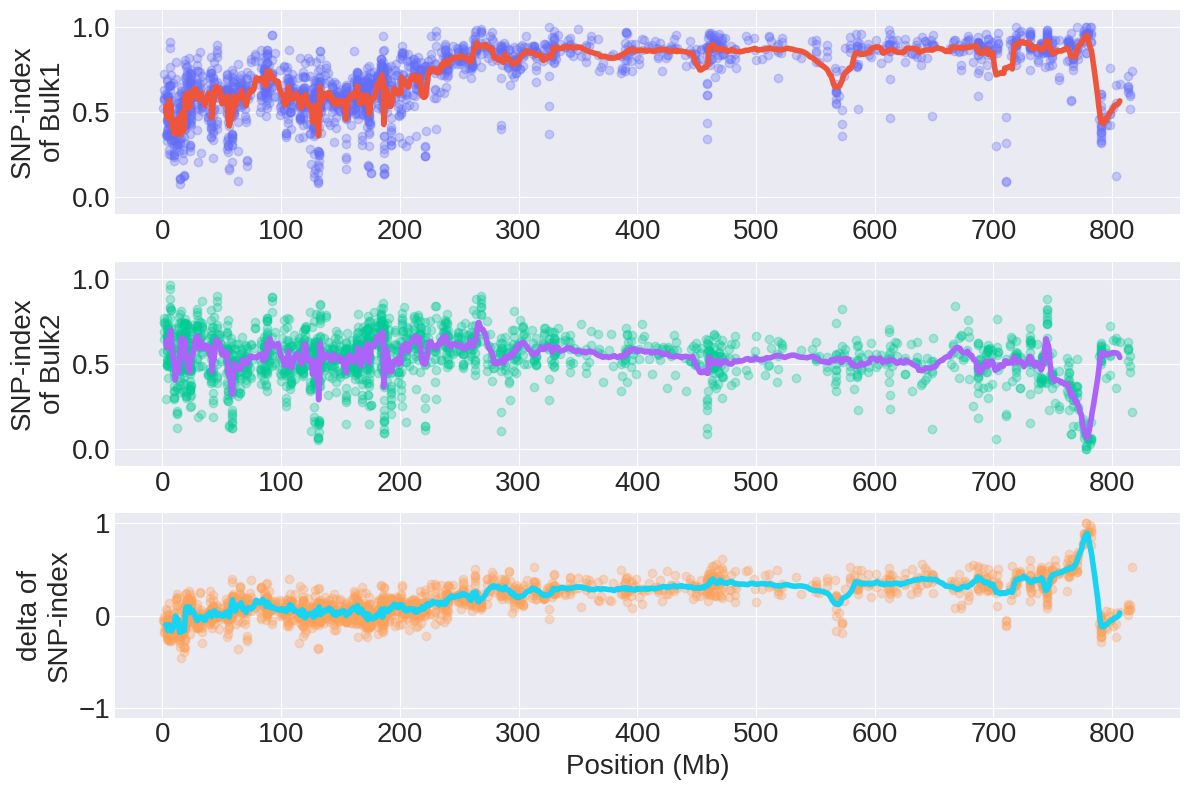

In [2]:
## SNP-index算出
##
## -------追記箇所 ---------------------------
bulk1_index = df["Bulk1_ALT"] / (df["Bulk1_REF"] + df["Bulk1_ALT"])
bulk2_index = df["Bulk2_ALT"] / (df["Bulk2_REF"] + df["Bulk2_ALT"])
## ----------------------------------------------
delta_index = bulk1_index - bulk2_index
position = df["POS"] / 1000000   # Mbp単位に変換
data = {"pos": position, "bulk1": bulk1_index, "bulk2": bulk2_index, "delta": delta_index}
## グラフ描画（散布図と移動平均）
draw_QTLseq(data)

# 課題2

　課題1の結果から、どこに原因遺伝子があると考えられるでしょうか？


In [ ]:
#@title { vertical-output: true, display-mode: "form" }
Answer = "780 Mb\u5468\u8FBA\u3002Bulk1\u306ESNP-index\u304C1.0\u306B\u8FD1\u304F\u3001\u304B\u3064\u3001Bulk2\u306ESNP-index\u304C0.0\u306B\u8FD1\u3044\uFF08SNP-index\u306E\u5DEE\u5206(delta)\u304C1.0\u306B\u8FD1\u3044\uFF09\u30B2\u30CE\u30E0\u9818\u57DF\u306B\u539F\u56E0\u907A\u4F1D\u5B50\u304C\u3042\u308B\u3002" #@param {type:"string"}


<div align="right"><a href="https://github.com/CropEvol/lecture#section2">実習表ページに戻る</a></div>